In [271]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2, f_regression, RFE, f_classif, SelectPercentile
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import r2_score, accuracy_score, classification_report, precision_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier

In [2]:
path = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/ames_feature_selection.csv'

In [3]:
ames = pd.read_csv(path)

#ames.head()

X = ames.iloc[ : , : -1]
y = ames.iloc[ : , -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

X_train['Class'] = y_train

t_corr = X_train.corr()

t_corr = t_corr['Class']

corr_columns = t_corr[abs(t_corr) > 0.5]

corr_columns.pop('Class')

#len(corr_columns)

X_train_new = X_train[corr_columns.index]
X_test_new = X_test[corr_columns.index]

X_train_new.head()

model = LinearRegression()

model.fit(X_train_new, y_train)

corr_score = model.score(X_test_new, y_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [4]:
print(corr_score)

0.7227056628201065


In [5]:
test = SelectKBest(score_func=f_regression, k=60)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

X_train = test.fit_transform(X_train, y_train)

X_test = test.transform(X_test)

model = LinearRegression()

model.fit(X_train, y_train)

chi2_score = model.score(X_test, y_test)

In [6]:
test = SelectKBest(score_func=f_regression, k=60)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

X_train = test.fit_transform(X_train, y_train)

X_test = test.transform(X_test)

model = LinearRegression()

model.fit(X_train, y_train)

f_regress_score = model.score(X_test, y_test)

In [7]:
nof_list=[20,30,40,50,60,70,80]

#Variable to store the highest score

high_score=0

#Variable to store the optimum features
nof=0

In [8]:
for n in nof_list:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
    model = LinearRegression()
    rfe = RFE(estimator=model, n_features_to_select=n)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)
    rfe.fit(X_train_rfe, y_train)
    print(rfe.score(X_test_rfe, y_test), n)
    if rfe.score(X_test_rfe, y_test) > high_score:
        high_score = rfe.score(X_test_rfe, y_test)
        nof = n

print(high_score, nof)

0.759010151790301 20
0.7627843526086596 30
0.7598045940926084 40
0.7617913485805194 50
0.7225065375447057 60
0.6939670674099847 70
0.6668881034551606 80
0.7627843526086596 30


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
lasso = Lasso(random_state=0)

lasso.fit(X_train, y_train)

lasso_score = lasso.score(X_test, y_test)

ridge = Ridge(random_state=0)

ridge.fit(X_train, y_train)

ridge_score = ridge.score(X_test, y_test)

In [10]:
lasso_score, ridge_score

(0.6671828548745306, 0.6788394406778494)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train, y_train)
X_test_scaled = scalar.transform(X_test, y_test)
pca = PCA(n_components=35, random_state=0)
X_train_pca = pca.fit_transform(X_train_scaled, y_train)
X_test_pca = pca.transform(X_test_scaled)
model = LinearRegression()
model.fit(X_train_pca, y_train)
pca_score = model.score(X_test_pca, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:765: DeprecationWarning: The parameter y on transform() is deprecated since 0.19 and will be removed in 0.21
  DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [12]:
pca_score

0.7614586077016584




# EDA Assessment



In [13]:
path = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/Forest_Type_Cover_Prediction_EDA.csv'

In [14]:
dataset = pd.read_csv(path)

dataset.head()

#dataset.shape

#dataset.info()

#dataset.describe()

#(dataset.describe().iloc[-1, 15 : ] > 0).sort_values()

#dataset[['Soil_Type15', 'Soil_Type7']].sum(axis = 0)

dataset.drop(columns=['Id'], axis=1, inplace=True)

In [15]:
dataset.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


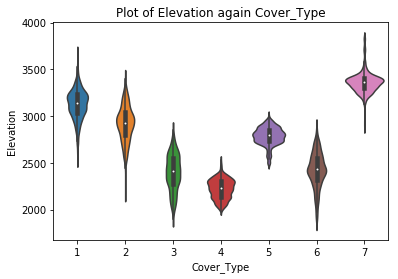

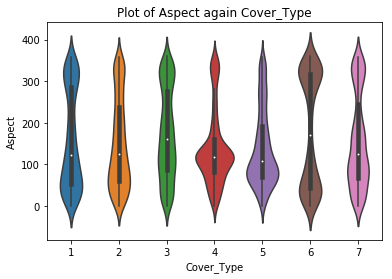

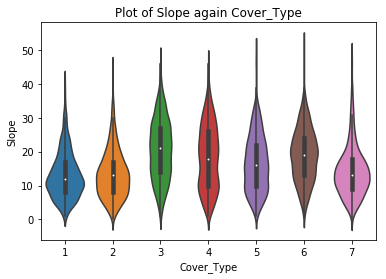

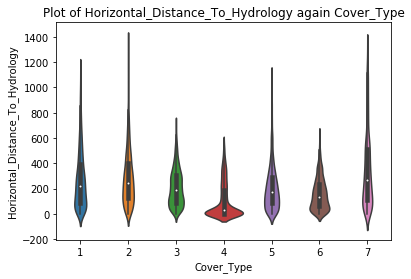

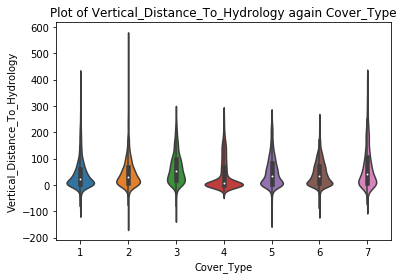

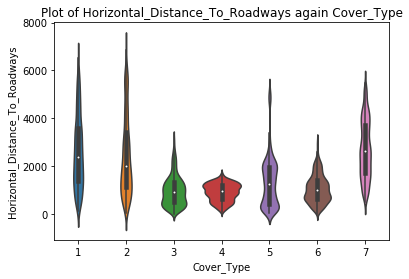

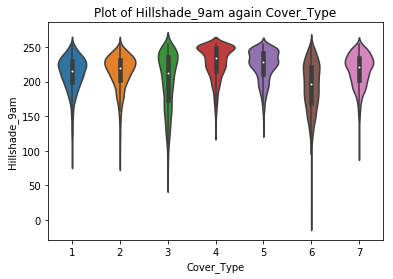

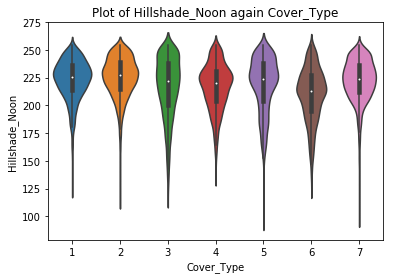

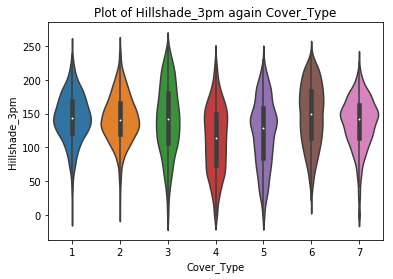

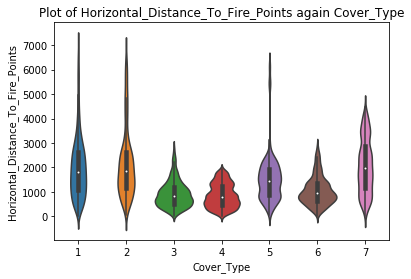

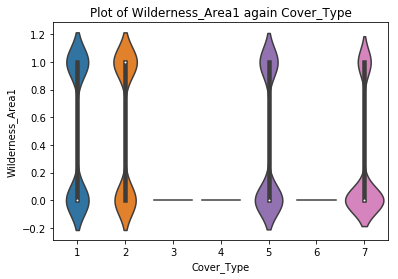

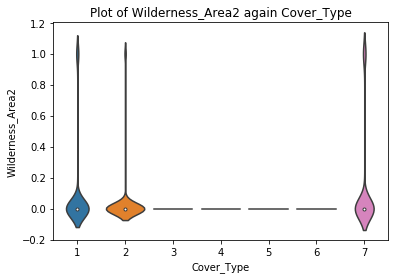

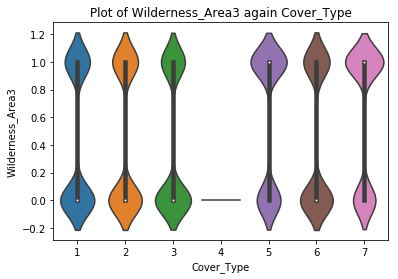

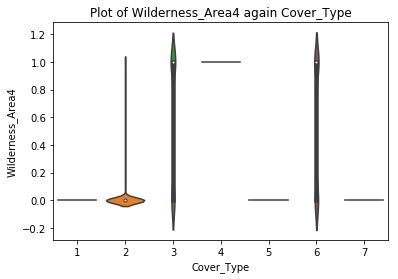

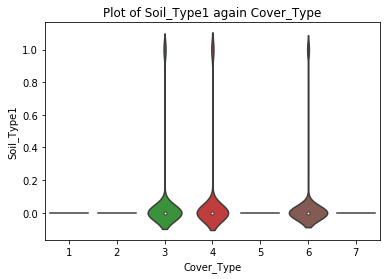

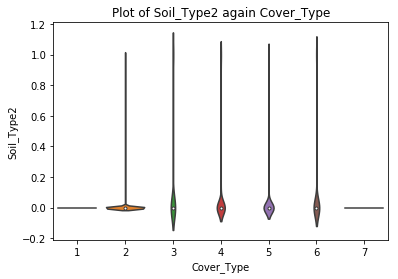

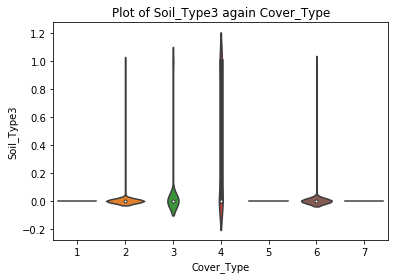

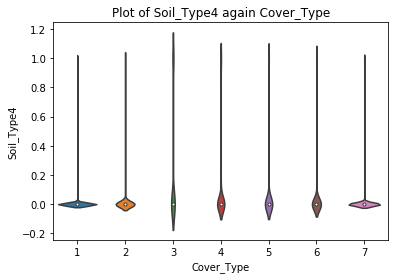

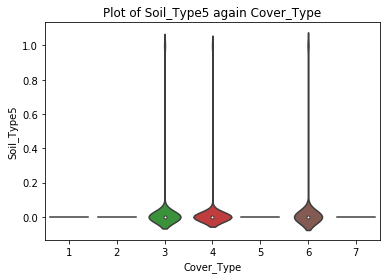

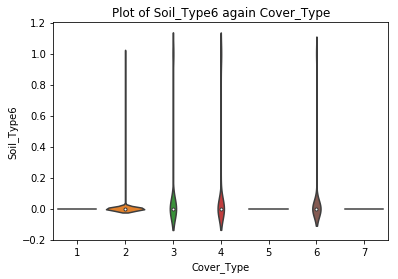

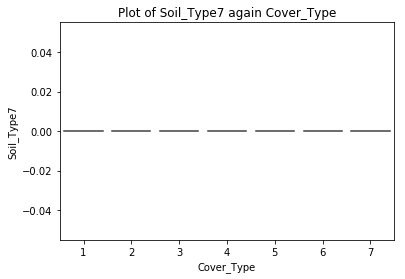

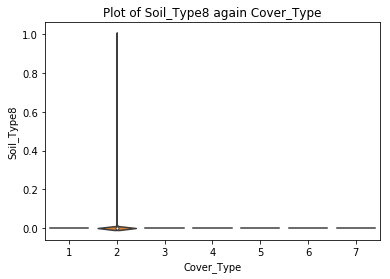

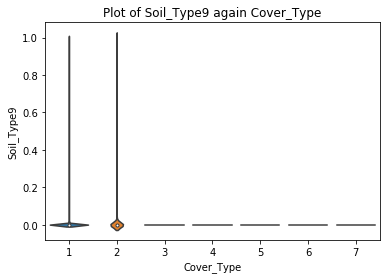

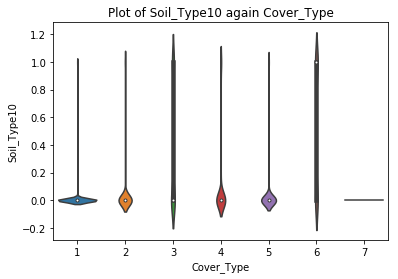

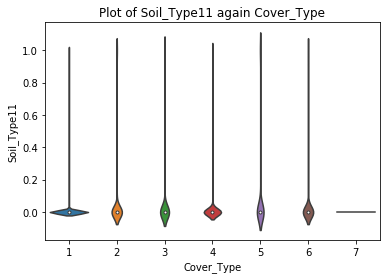

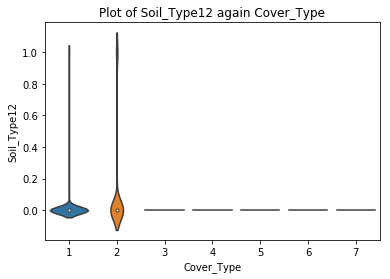

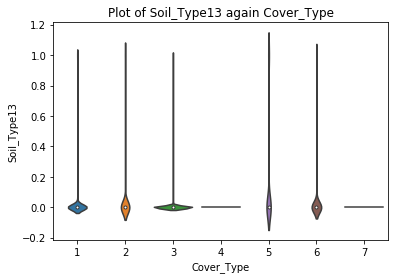

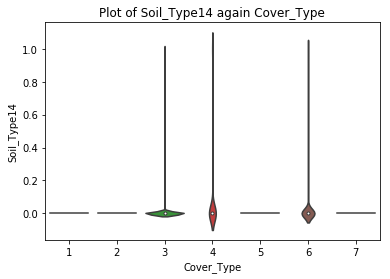

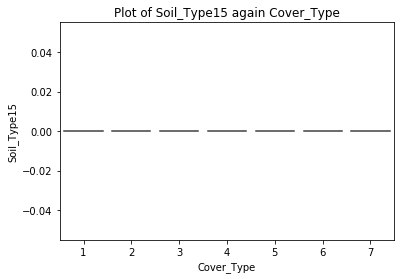

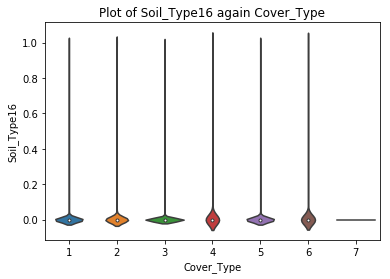

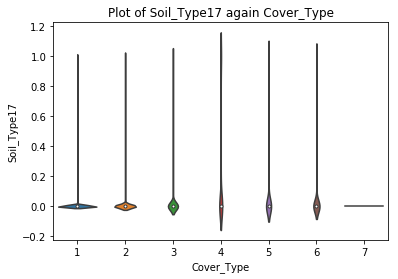

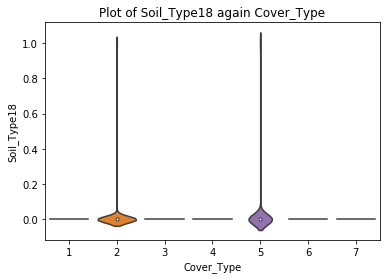

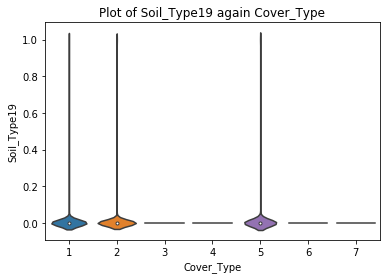

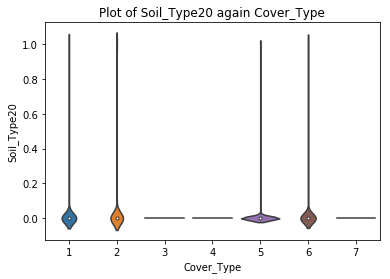

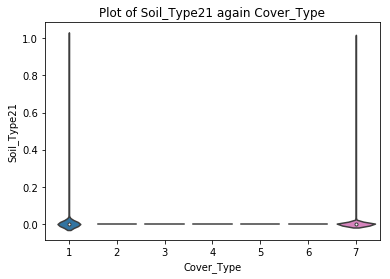

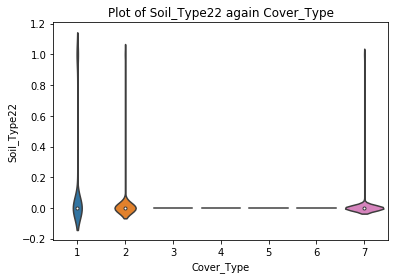

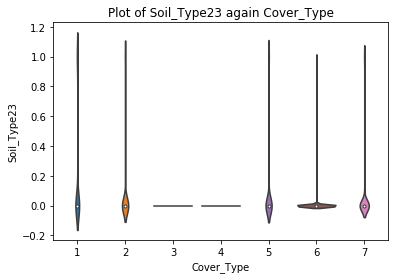

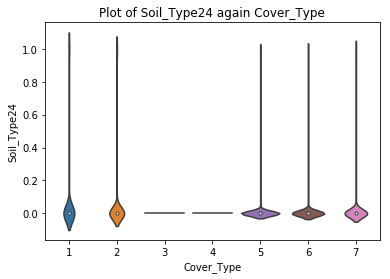

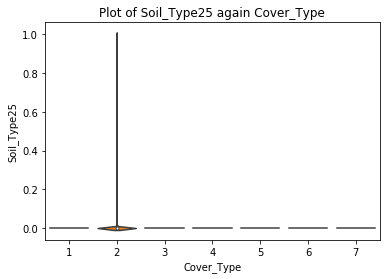

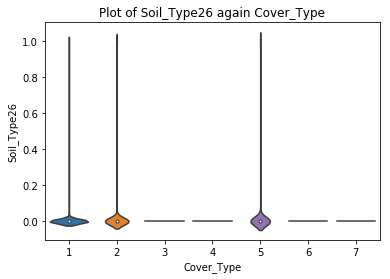

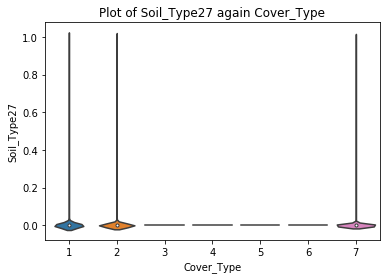

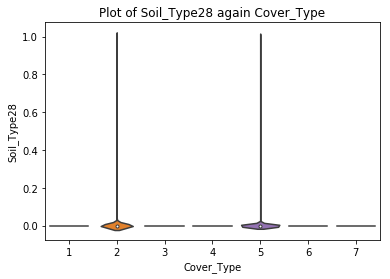

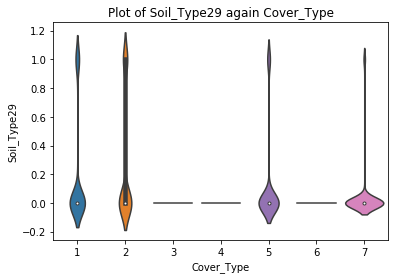

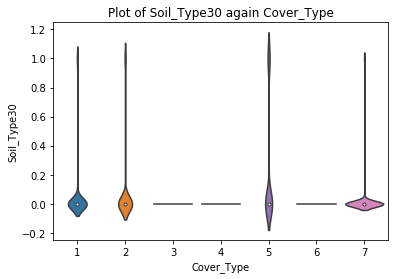

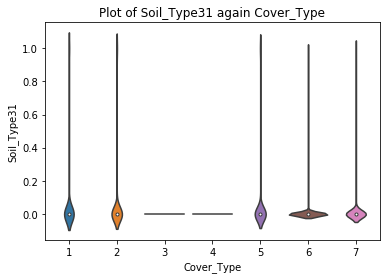

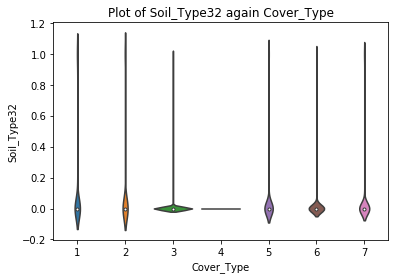

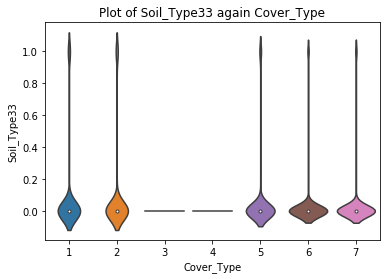

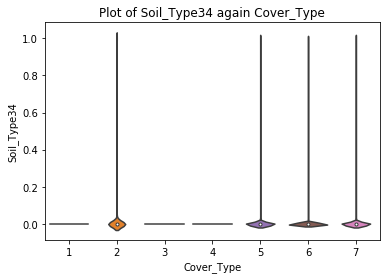

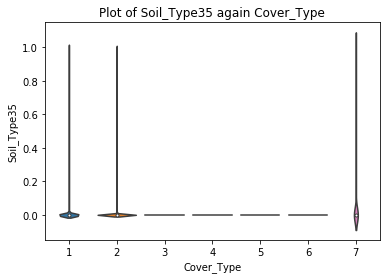

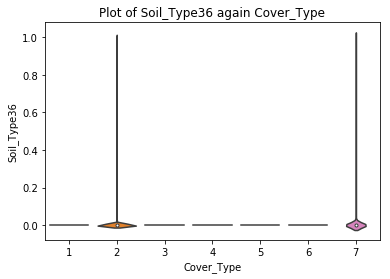

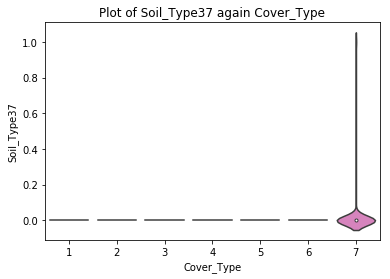

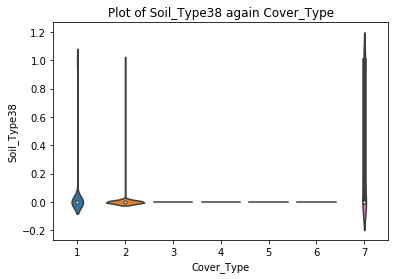

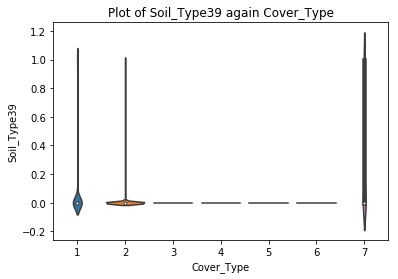

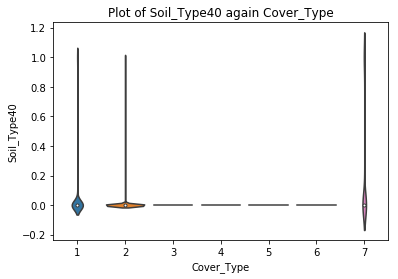

In [16]:
cols = list(dataset.columns)

size = len(cols) - 1

x = cols[-1]

y = cols[ : -1]

i = 0
while (i < size):
    sns.violinplot(x, y[i], data=dataset, figsize = (10, 10))
    plt.title('Plot of {} again {}'.format(y[i], x))
    plt.show()
    i = i + 1

In [17]:
dataset.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


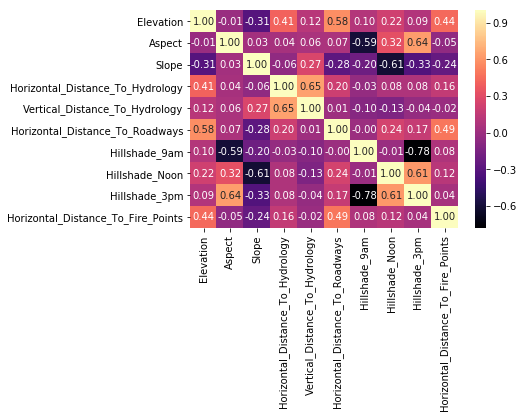

In [18]:
upper_threshold = 0.5
lower_threshold = -0.5

subset_train = dataset.iloc[ : , : 10]

data_corr = subset_train.corr(method='pearson')

sns.heatmap(data=data_corr, annot=True, fmt='.2f', cmap='magma')

correlation = data_corr.unstack().sort_values(kind='quicksort')

corr_var_list = correlation[((correlation >= upper_threshold) | (correlation <= lower_threshold)) & (correlation != 1)]



In [165]:
#dataset.drop(columns=['Soil_Type7', 'Soil_Type15'], inplace=True)

size = 10

X = dataset.iloc[ : , : -1]
y = dataset.iloc[ : , -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

scaler = StandardScaler()

X_train_temp = scaler.fit_transform(X_train.iloc[:,0:size])
X_test_temp = scaler.fit_transform(X_test.iloc[:,0:size])

X_train1 = np.concatenate([X_train_temp,X_train.values[:,size:]], axis=1)
X_test1 = np.concatenate((X_test_temp,X_test.values[:,size:]), axis=1)

X_train_temp.shape, X_train1.shape

scaled_features_train_df = pd.DataFrame(data = X_train1, columns=list(X_train.columns), index=X_train.index)
scaled_features_test_df = pd.DataFrame(data = X_test1, columns=list(X_test.columns), index=X_test.index)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [261]:
skb = SelectPercentile(score_func=f_classif, percentile=20)

predictors = skb.fit_transform(X_train1, y_train)

scores = skb.scores_.tolist()

Features = scaled_features_train_df.columns.tolist()

dataframe = pd.DataFrame({'Features' : Features, 'scores' : scores})

dataframe.sort_values(by = 'scores', ascending=False, inplace= True)

top_k_predictors = [dataframe['Features'][i] for i in skb.get_support(indices = True)]

In [266]:
list(dataframe['Features'][:predictors.shape[1]])

['Elevation',
 'Wilderness_Area4',
 'Horizontal_Distance_To_Roadways',
 'Soil_Type10',
 'Soil_Type3',
 'Wilderness_Area1',
 'Soil_Type38',
 'Horizontal_Distance_To_Fire_Points',
 'Soil_Type39',
 'Wilderness_Area3',
 'Soil_Type40']

In [269]:
[dataframe['Features'][i] for i in skb.get_support(indices = True)]

['Elevation',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type3',
 'Soil_Type10',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

In [274]:
clf = OneVsRestClassifier(estimator=LogisticRegression())
clf1 = OneVsRestClassifier(estimator=LogisticRegression())

model_fit_all_features = clf1.fit(X_train, y_train)

predictions_all_features = model_fit_all_features.predict(X_test)

score_all_features = accuracy_score(y_test, predictions_all_features)

score_all_features

model_fit_top_features = clf.fit(scaled_features_train_df[top_k_predictors], y_train)

predictions_top_features = clf.predict(scaled_features_test_df[top_k_predictors])

score_top_features = accuracy_score(y_test, predictions_top_features)

score_top_features